<a href="https://colab.research.google.com/github/lcduquev/Analisis-Numerico/blob/master/Steepest_Descent_Method_Example_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Example 8
Find the minimizer of $f (x) = x_1e^{−(x_1^2+x_2^2 )}$.


Nos interesan 2 valores: el gradiente para calcular cada uno de los x y el tamaño de paso.


Steepest Descent Method

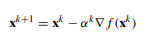

## Programación de los metodos

In [ ]:
import numpy as np
from scipy import optimize

In [ ]:
def f(x1,x2):
    return x1*np.exp(-x1**2-x2**2)  #Defino la función a minimizar

In [ ]:
def grad(x1,x2): #Defino el gradiente de la función
    return np.array([-2*x1**2*np.exp(-x1**2 - x2**2) + np.exp(-x1**2 - x2**2), -2*x1*x2*np.exp(-x1**2 - x2**2)])

### Gradiente desendiente paso optimizado

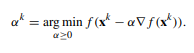

In [ ]:
def gd1(x, f, grad, a, max_iter): #Gradiente desendiente paso optimizado
  xs = np.zeros((1 + max_iter, 2))
  xs[0,:] = x

  for i in range(max_iter):
    g = grad(x[0],x[1])
    def phi(s):
      return f(x[0]-s*g[0],x[1]-s*g[1])

    a = optimize.fminbound(phi, 0, 10)

    x = x - a * g
    xs[i+1,:] = x

    tol = abs(f(xs[i+1,0],xs[i+1,1])-f(xs[i,0],xs[i,1]))/max(1,abs(f(xs[i,0],xs[i,1])))
    if tol < epsi:
      break
  return xs,i+1

### Gradiente desendiente paso fijo

In [ ]:
def gd2(x, grad, a, max_iter, epsi): #Gradiente desendiente paso fijo    
  xs = np.zeros((1 + max_iter, 2))
  xs[0,:] = x
  for i in range(max_iter):
      x = x - a * grad(x[0],x[1])
      xs[i+1,:] = x
      #tolerancia: criterio de finalización
      tol = abs(f(xs[i+1,0],xs[i+1,1])-f(xs[i,0],xs[i,1]))/max(1,abs(f(xs[i,0],xs[i,1])))
      if tol < epsi: #en caso tal de no encontrar un optimo finalizar con el algoritmo
        break
  return xs,i+1

## Ejecución del ejemplo

In [ ]:
import matplotlib.pyplot as plt

### Gradiente desendiente paso optimizado

In [ ]:
x = np.array([-1,1])
epsi = 0.001;
max_iter = 1000

In [ ]:
res1 = gd1(x, f, grad, epsi, max_iter)
xs1 = res1[0]
i1 = res1[1]

-0.7084550706365015 0.005388249941177411


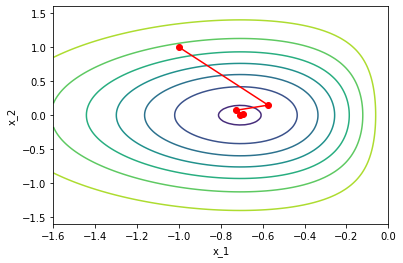

In [ ]:
xx = np.linspace(-1.6, 0, 64)
yy = np.linspace(-1.6, 1.6, 128)
X, Y = np.meshgrid(xx, yy)
Z = X*np.exp(-X**2-Y**2)
c = plt.contour(X, Y, Z)
plt.plot(xs1[0:i1+1,0],xs1[0:i1+1,1],'-ro')
plt.xlabel('x_1')
plt.ylabel('x_2')
print(xs1[i1,0],xs1[i1,1])
#se alcanza el mínimo en una menor cantidad de operaciones a el de paso fijo

Text(0, 0.5, 'f(x)')

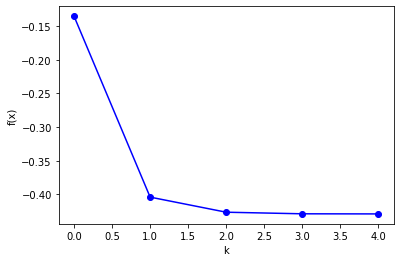

In [ ]:
plt.plot(f(xs1[0:i1+1,0],xs1[0:i1+1,1]),'-bo')
plt.xlabel('k')
plt.ylabel('f(x)')

### Gradiente desendiente paso fijo



In [ ]:
x = np.array([-1,1])
max_iter = 1000
epsi = 0.001; #tolerancia
a = 0.25 #tamaño de paso fijo

In [ ]:
res2 = gd2(x, grad, a, max_iter,epsi)
xs2 = res2[0]
i2 = res2[1]

-0.7076878221075938 0.05661084383490203


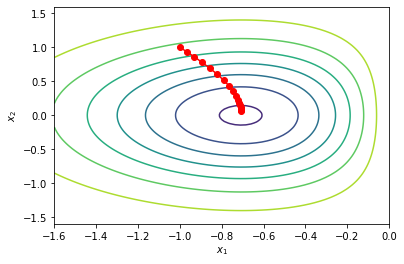

In [ ]:
xx = np.linspace(-1.6, 0, 64)
yy = np.linspace(-1.6, 1.6, 128)
X, Y = np.meshgrid(xx, yy)
Z = X*np.exp(-X**2-Y**2)
c = plt.contour(X, Y, Z)
plt.plot(xs2[0:i2+1,0],xs2[0:i2+1,1] , '-ro')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
print(xs2[i2,0],xs2[i2,1]) #imprimir los valores mínimos encontrados para x1 y x2

Text(0, 0.5, 'f(x)')

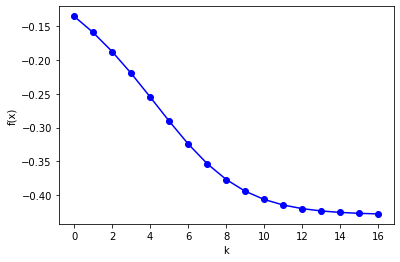

In [ ]:
#graficamos los 16 pasos
plt.plot(f(xs2[0:i2+1,0],xs2[0:i2+1,1]),'-bo')
plt.xlabel('k')
plt.ylabel('f(x)')